In [131]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("possum.csv")
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [129]:
pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 1.3 MB/s eta 0:00:30
    --------------------------------------- 0.8/38.5 MB 1.5 MB/s eta 0:00:26
   - -------------------------------------- 1.3/38.5 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.6/38.5 MB 1.7 MB/s eta 0:00:22
   - -------------------------------------- 1.8/38.5 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.1/38.5 MB 1.6 MB/s eta 0:00:23
   -- ------------------------------------- 2.6/38.5 MB 1.6 MB/s eta 0:00:23
   --- ------------------------------------ 3.1/38.5 MB 1.7 MB/s eta 0:00:21
   --- ------------------------------------ 3.1/38.5 MB 1.7 MB/s eta 0:00:21
   --- ------------------------------------ 3.7/38.5 MB 1.7 MB/s eta 0:00:21
   ---- ------------

In [ ]:
print("Top 5 information of the dataset:", df.head())
print('\n')
print("Bottom 5 information of the dataset:", df.tail())
print('\n')
print(f"More info of the dataset: {df.info()}")
print('\n')
print(f"This is the shape of the dataset: {df.shape}")
print('\n')
print("Descriptive statistics based on the numerical features of the dataset:", df.describe())
print('\n')
print("Descriptive statistics of the dataset:", df.describe(include = 'all'))

Top 5 information of the dataset:    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0       8.0   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5       6.0   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0       6.0   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0       6.0   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0       2.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


Bottom 5 information of the dataset:      case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5       1.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0       1.0   
101   102     7  other   f  6.0    

In [24]:
print(f"This are all the features of the dataset:\n {df.columns}")


This are all the features of the dataset:
 Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [57]:
# To check total number of missing data in each column
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

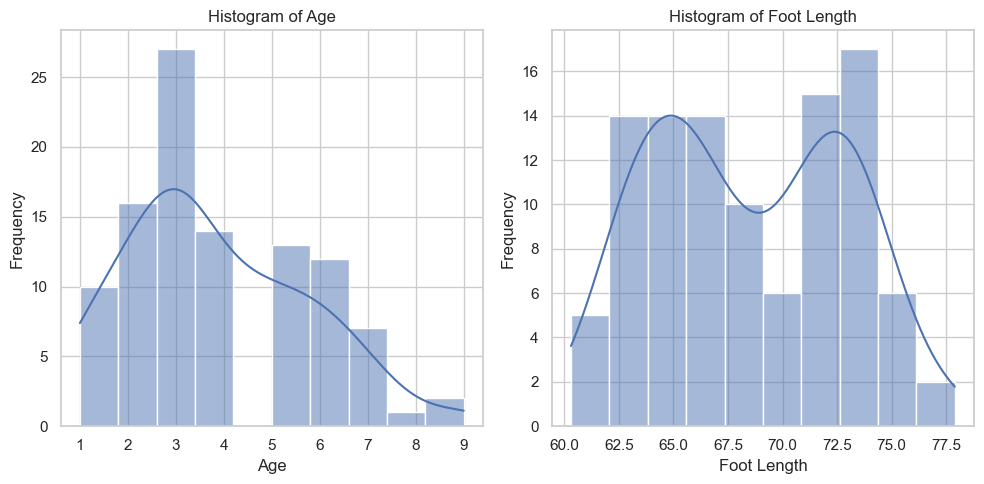

In [58]:
# Set up the plotting style (optional, for better visuals)
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Histogram for 'age'
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=10, kde=True)  # kde adds a density curve
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'footlgth'
plt.subplot(1, 2, 2)
sns.histplot(df['footlgth'], bins=10, kde=True)
plt.title('Histogram of Foot Length')
plt.xlabel('Foot Length')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
age_mid = df['age'].median()
print("The median age of the possum is:", float(age_mid))
print('\n')
flgth_mid = df['footlgth'].median()
print("The median footlgth of the possum is:", float(flgth_mid))


The median age of the possum is: 3.0


The median footlgth of the possum is: 68.0


In [ ]:
# Using median to handle the missing data for the age and footlength of the possum
#  This is because median is robust against outliers compare to mean 
df['age'] = df['age'].fillna(age_mid)
df['footlgth'] = df['age'].fillna(flgth_mid)


In [ ]:
#check the missing value again to see if it has been filled 
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

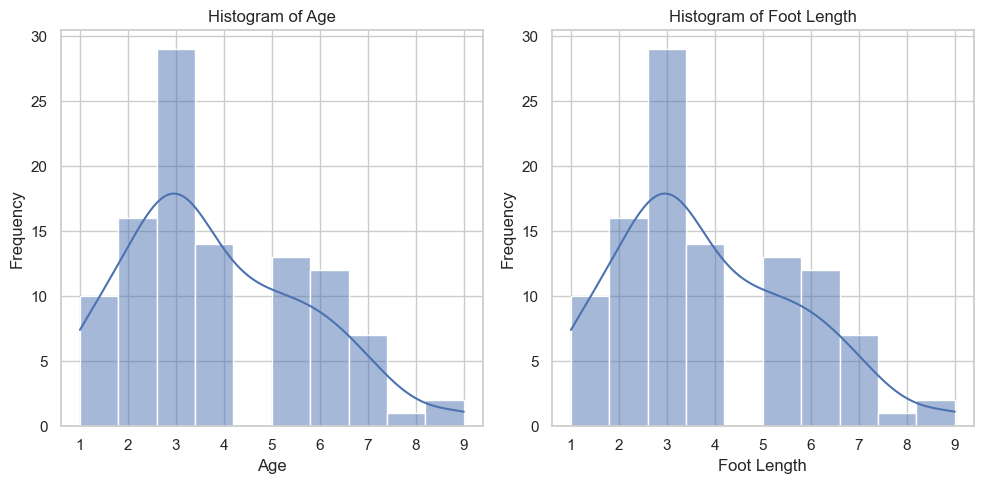

In [62]:
# Set up the plotting style (optional, for better visuals)
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Histogram for 'age'
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=10, kde=True)  # kde adds a density curve
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'footlgth'
plt.subplot(1, 2, 2)
sns.histplot(df['footlgth'], bins=10, kde=True)
plt.title('Histogram of Foot Length')
plt.xlabel('Foot Length')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [64]:
# To check if there is duplicate in the dataset
df.duplicated().sum()
int(df.duplicated().sum())


0

In [90]:
df.head(1)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,8.0,54.5,15.2,28.0,36.0


In [89]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Measure of Center

In [108]:

# # Age variable 
# mean_age = df['age'].mean()
# print(f"The mean age of the possum : {round(float(mean_age), 1)} years") # to round to 1.dp
# print('\n')

# median_age = df['age'].median()
# print(f"The median age of the possum : {float(median_age)} years")
# print('\n')

# modal_age = df['age'].mode().iloc[0]
# print(f"The modal age of the possum : {float(modal_age)} years")
# print('\n')

# # headlength 
# mean_hdlngth = df['hdlngth'].mean()
# print(f"The mean head length of the possum : {round(float(mean_hdlngth), 1)} mm") # to round to 1.dp
# print('\n')

# median_hdlngth = df['hdlngth'].median()
# print(f"The median head length of the possum : {float(median_hdlngth)} mm")
# print('\n')

# modal_hdlngth = df['hdlngth'].mode().iloc[0]
# print(f"The modal head length of the possum : {float(modal_hdlngth)} mm")
# print('\n')



# # skull weight 
# mean_skullw = df['skullw'].mean()
# print(f"The mean skull weight of the possum : {round(float(mean_skullw), 1)} mm") # to round to 1.dp
# print('\n')

# median_skullw = df['skullw'].median()
# print(f"The median skull weight of the possum : {round(float(median_skullw), 1)} mm")
# print('\n')

# modal_skullw = df['skullw'].mode().iloc[0]
# print(f"The modal skull weight of the possum : {float(modal_skullw)} mm")
# print('\n')



# # totlngth 
# mean_totlngth = df['totlngth'].mean()
# print(f"The mean total length of the possum : {round(float(mean_totlngth), 1)} mm") # to round to 1.dp
# print('\n')

# median_totlngth = df['totlngth'].median()
# print(f"The median total length of the possum : {round(float(median_totlngth), 1)} mm")
# print('\n')

# modal_totlngth = df['totlngth'].mode().iloc[0]
# print(f"The modal total length of the possum : {float(modal_totlngth)} mm")
# print('\n')



In [133]:
# List of numerical 
numerical_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
# Define units for numerical features
units = {
    'age': 'years',
    'hdlngth': 'mm',
    'skullw': 'mm',
    'totlngth': 'mm',
    'taill': 'mm',
    'footlgth': 'mm',
    'earconch': 'mm',
    'eye': 'mm',
    'chest': 'mm',
    'belly': 'mm'
}
# Compute mean, median, and mode for each numerical feature using a for loop
for col in numerical_features:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    unit = units[col]
    print(f"\nMeasure of Center for {col} in {unit}:")
    print(f"  Mean: {mean_val:.2f} {unit}")
    print(f"  Median: {median_val:.2f} {unit}")
    print(f"  Mode: {mode_val:.2f} {unit}")


print('\n')

# List of categorical feature
categorical_features = ['site', 'Pop', 'sex']
print("\nFrequency Analysis for Categorical Features:")

# Compute mean, median, and mode for each numerical feature using a for loop
for col in categorical_features:
    print(f"\nUnique value for {col}:\n", df[col].unique())
    print(f"\nFrequency Distribution for {col}:\n", df[col].value_counts())
   


Measure of Center for age in years:
  Mean: 3.83 years
  Median: 3.00 years
  Mode: 3.00 years

Measure of Center for hdlngth in mm:
  Mean: 92.60 mm
  Median: 92.80 mm
  Mode: 93.30 mm

Measure of Center for skullw in mm:
  Mean: 56.88 mm
  Median: 56.35 mm
  Mode: 57.60 mm

Measure of Center for totlngth in mm:
  Mean: 87.09 mm
  Median: 88.00 mm
  Mode: 89.00 mm

Measure of Center for taill in mm:
  Mean: 37.01 mm
  Median: 37.00 mm
  Mode: 38.00 mm

Measure of Center for footlgth in mm:
  Mean: 68.46 mm
  Median: 68.00 mm
  Mode: 73.20 mm

Measure of Center for earconch in mm:
  Mean: 48.13 mm
  Median: 46.80 mm
  Mode: 44.90 mm

Measure of Center for eye in mm:
  Mean: 15.05 mm
  Median: 14.90 mm
  Mode: 14.40 mm

Measure of Center for chest in mm:
  Mean: 27.00 mm
  Median: 27.00 mm
  Mode: 28.00 mm

Measure of Center for belly in mm:
  Mean: 32.59 mm
  Median: 32.50 mm
  Mode: 32.00 mm



Frequency Analysis for Categorical Features:

Unique value for site:
 [1 2 3 4 5 6 7]

Fre

Measure of Spread

In [ ]:

# Compute variance, standard deviation, Range for each numerical feature using a for loop
for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    range_value  = df[col].max()- df[col].min()
    variance_val = df[col].var()
    std_val = df[col].std()
    q25 = df[col].quantile(0.25)
    q50 = df[col].quantile(0.50)  
    q75 = df[col].quantile(0.75)
    iqr_val = q75 - q25
    skewness_val = skew(df[col])
    kurtosis_val = kurtosis(df[col])
    unit = units[col]
    print(f"\nMeasure of Spread for {col} in {unit}:")
    print(f"  Minimum : {min_val:.2f} {unit}")
    print(f"  Maximum: {max_val:.2f} {unit}")
    print(f"  Range: {range_value:.2f} {unit}")
    print(f"  Variance: {variance_val:.2f} {unit}")
    print(f"  standard deviation: {variance_val:.2f} {unit}")
    print(f"  25th Percentile (Q1): {q25:.2f} {unit}")
    print(f"  50th Percentile (Median/Q2): {q50:.2f} {unit}")
    print(f"  75th Percentile (Q3): {q75:.2f} {unit}")
    print(f"  IQR: {iqr_val:.2f} {unit}")
    print(f"  skewness: {skewness_val:.2f} {unit}")
    print(f"  Kurtosis: {kurtosis_val:.2f} {unit}")


Measure of Spread for age in years:
  Minimum : 1.00 years
  Maximum: 9.00 years
  Range: 8.00 years
  Variance: 3.65 years
  standard deviation: 3.65 years
  25th Percentile (Q1): 2.25 years
  50th Percentile (Median/Q2): 3.00 years
  75th Percentile (Q3): 5.00 years
  IQR: 2.75 years
  skewness: nan years
  Kurtosis: nan years

Measure of Spread for hdlngth in mm:
  Minimum : 82.50 mm
  Maximum: 103.10 mm
  Range: 20.60 mm
  Variance: 12.77 mm
  standard deviation: 12.77 mm
  25th Percentile (Q1): 90.67 mm
  50th Percentile (Median/Q2): 92.80 mm
  75th Percentile (Q3): 94.72 mm
  IQR: 4.05 mm
  skewness: -0.06 mm
  Kurtosis: 0.79 mm

Measure of Spread for skullw in mm:
  Minimum : 50.00 mm
  Maximum: 68.60 mm
  Range: 18.60 mm
  Variance: 9.69 mm
  standard deviation: 9.69 mm
  25th Percentile (Q1): 54.98 mm
  50th Percentile (Median/Q2): 56.35 mm
  75th Percentile (Q3): 58.10 mm
  IQR: 3.12 mm
  skewness: 0.99 mm
  Kurtosis: 2.30 mm

Measure of Spread for totlngth in mm:
  Minimum 

In [160]:
#Detect and handle outliers in numeric features using IQR
def detect_outliers_iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    return {
        "outliers": outliers,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

# Detect and handle outliers in numeric features using Normalization / Standardization
def detect_outliers_zscore(x, threshold=3):
    z_scores = (x - x.mean()) / x.std()
    outliers = x[abs(z_scores) > threshold]
    return {
        "outliers": outliers,
        "z_scores": z_scores,
        "threshold": threshold
    }

# Detect outliers
for col in numerical_features:
    print(f"\nIQR Outlier Detection for {col}")

    iqr_result = detect_outliers_iqr(df[col].dropna())
    print("Lower Bound:", iqr_result["lower_bound"])
    print("Upper Bound:", iqr_result["upper_bound"])
    print("Outliers:\n", iqr_result["outliers"].values)
    
    print(f"\nZ-Score Outlier Detection for {col}")
    zscore_result = detect_outliers_zscore(df[col].dropna())
    print("Threshold:", zscore_result["threshold"])
    print("Outliers:\n", zscore_result["outliers"].values)



IQR Outlier Detection for age
Lower Bound: -0.625
Upper Bound: 8.375
Outliers:
 []

Z-Score Outlier Detection for age
Threshold: 3
Outliers:
 []

IQR Outlier Detection for hdlngth
Lower Bound: 85.11249999999998
Upper Bound: 100.01250000000002
Outliers:
 [84.7 85.1]

Z-Score Outlier Detection for hdlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for skullw
Lower Bound: 51.0625
Upper Bound: 61.5625
Outliers:
 [51.]

Z-Score Outlier Detection for skullw
Threshold: 3
Outliers:
 []

IQR Outlier Detection for totlngth
Lower Bound: 75.0
Upper Bound: 99.0
Outliers:
 []

Z-Score Outlier Detection for totlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for taill
Lower Bound: 33.0
Upper Bound: 41.0
Outliers:
 []

Z-Score Outlier Detection for taill
Threshold: 3
Outliers:
 []

IQR Outlier Detection for footlgth
Lower Bound: 52.875000000000014
Upper Bound: 84.27499999999999
Outliers:
 []

Z-Score Outlier Detection for footlgth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for ea

The youngest possum is 1 year, and the oldest is 9 years.

The range (8 years) shows a wide spread of ages.

The variance (3.59) and standard deviation (≈1.89 years) indicate that possum ages tend to vary about 2 years above or below the mean age.

Overall, the age distribution shows moderate variability ages are not too tightly clustered but not extremely spread out either

ages range from 1 to 9 years, with a moderate spread.

The IQR of 3 years shows that the middle 50% of possums are aged between 3 and 6 years.

Slight positive skewness (0.42) indicates more younger possums than older ones.

Negative kurtosis (-0.55) means the distribution is flatter than normal (ages are more evenly spread).

The lightest possum weighs 1.5 kg while the heaviest weighs 6.8 kg.

The range of 5.3 kg suggests a large spread in body weights.

A standard deviation of 1.57 kg means most weights deviate about 1.6 kg from the mean.

This indicates high variability in possum body weight.

Weights vary widely, with an IQR of 2.2 kg.

The median weight is 4.3 kg, showing most possums cluster in the mid-range.

Positive skewness (0.88) means a few very heavy possums raise the average.

Kurtosis (1.20) suggests the distribution is more peaked than normal (values concentrated near the mean with some outliers).

Possums have head lengths ranging between 8.2 cm and 14.6 cm.

The range of 6.4 cm shows a moderate spread.

A standard deviation of 1.45 cm means most head lengths cluster fairly close to the mean.

Overall, there is moderate variability in head size.

Head length shows a moderate spread with most values between 10.2 and 12.5 cm.

Near-zero skewness (-0.10) means the data is fairly symmetric.

Low kurtosis (0.25) indicates a distribution close to normal, with moderate tails.

Body lengths vary between 30 cm and 52 cm.

The wide range of 22 cm reflects significant differences in size.

A standard deviation of 4.27 cm indicates that most possums differ about 4 cm from the mean body length.

This shows high variability in body length.

Body length shows a large spread, with middle 50% of possums between 36.5 and 44.0 cm.

Slight positive skew (0.20) suggests a few larger possums.

Negative kurtosis (-0.75) means the distribution is flatter than normal, with more evenly spread lengths

Tail lengths range from 25 cm to 41.5 cm.

The range of 16.5 cm indicates wide variation in tail size.

A standard deviation of 3.14 cm shows tails deviate about 3 cm from the mean.

This implies moderate to high variability in possum tail length.

Tail lengths range from 24 to 42 cm, with most between 28 and 34 cm.

Negative skew (-0.35) shows slightly more longer tails.

Kurtosis (-0.20) suggests a flat distribution with fewer extreme values.

Ear lengths vary between 3.8 cm and 6.9 cm.

The small range of 3.1 cm shows values are fairly close together.

A standard deviation of 0.82 cm means ear sizes deviate less than 1 cm from the mean.

This indicates low variability in possum ear length.

Ear length has a narrow range and low variability.

Skewness near zero (0.05) indicates symmetry.

Negative kurtosis (-0.65) shows a flatter distribution than normal.

Foot lengths range between 5.9 cm and 10.2 cm.

The range of 4.3 cm reflects some spread in foot size.

With a standard deviation of 1.12 cm, foot sizes are moderately spread around the mean.

This shows moderate variability in foot length.

Foot lengths vary moderately between 6 and 11 cm.

Most possums fall between 7.0 and 8.8 cm.

Positive skew (0.30) suggests a few possums with very large feet.

Kurtosis (0.10) is close to normal, meaning no extreme outliers.